# CSCI 5930 Machine Learning Fall 2023
# Project: Genetic Disorder Prediction Using SVM With Explainability
# Instructor: Ashis Biswas PhD
# Student: Austin Long

### Description
This project is designed to read in some publicly available genetic and medical data that correspond to specific diseases that the patient then developed. The idea is that the Support Vector Machine (SVM) will take in the input data and be able to predict the disease that the patient will later develop. The added feature to this project is that after the predictions are made, the patient is then provided with explainable results using Explainable AI (XAI) techniques. This project utilizes LIME to explain the predicted outcomes by showing what contributed the most and the least to the prediction. 

Import Necessary Modules

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Declare Test and Training Genom data

In [2]:
gen_train = pd.read_csv('data/train.csv')

Drop Unnecessary Column Data

In [3]:
gen_train.drop("Patient Id", axis=1, inplace=True)
gen_train.drop("Family Name", axis=1, inplace=True)
gen_train.drop("Patient First Name", axis=1, inplace=True)
gen_train.drop("Father's name", axis=1, inplace=True)
gen_train.drop("Institute Name", axis=1, inplace=True)
gen_train.drop("Location of Institute", axis=1, inplace=True)
gen_train.drop("Place of birth", axis=1, inplace=True)
gen_train.drop("Parental consent", axis=1, inplace=True)

Check for missing values (NaN, None, etc)

In [4]:
gen_train.isna().sum()

Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mother's age                                        6036
Father's age                                        5986
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min)                              2113
Test 1                                              2127
Test 2                                              2152
Test 3                                              2147
Test 4                                              2140
Test 5                                              2170
Follow-up                                           2166
Gender                         

Fill missing values with the mode of the data in each respective column. Mode is used because data is primarily binary (0 or 1, yes or no) therefore an average will not suffice

In [5]:
gen_train["Patient Age"].fillna(str(gen_train["Patient Age"].mode().values[0]), inplace=True)
gen_train["Inherited from father"].fillna(str(gen_train["Inherited from father"].mode().values[0]), inplace=True)
gen_train["Maternal gene"].fillna(str(gen_train["Maternal gene"].mode().values[0]), inplace=True)
gen_train["Mother's age"].fillna(str(gen_train["Mother's age"].mode().values[0]), inplace=True)
gen_train["Father's age"].fillna(str(gen_train["Father's age"].mode().values[0]), inplace=True)
gen_train["Respiratory Rate (breaths/min)"].fillna(str(gen_train["Respiratory Rate (breaths/min)"].mode().values[0]), inplace=True)
gen_train["Heart Rate (rates/min)"].fillna(str(gen_train["Heart Rate (rates/min)"].mode().values[0]), inplace=True)
gen_train["Test 1"].fillna(str(gen_train["Test 1"].mode().values[0]), inplace=True)
gen_train["Test 2"].fillna(str(gen_train["Test 2"].mode().values[0]), inplace=True)
gen_train["Test 3"].fillna(str(gen_train["Test 3"].mode().values[0]), inplace=True)
gen_train["Test 4"].fillna(str(gen_train["Test 4"].mode().values[0]), inplace=True)
gen_train["Test 5"].fillna(str(gen_train["Test 5"].mode().values[0]), inplace=True)
gen_train["Follow-up"].fillna(str(gen_train["Follow-up"].mode().values[0]), inplace=True)
gen_train["Gender"].fillna(str(gen_train["Gender"].mode().values[0]), inplace=True)
gen_train["Birth asphyxia"].fillna(str(gen_train["Birth asphyxia"].mode().values[0]), inplace=True)
gen_train["Autopsy shows birth defect (if applicable)"].fillna(str(gen_train["Autopsy shows birth defect (if applicable)"].mode().values[0]), inplace=True)
gen_train["Folic acid details (peri-conceptional)"].fillna(str(gen_train["Folic acid details (peri-conceptional)"].mode().values[0]), inplace=True)
gen_train["H/O serious maternal illness"].fillna(str(gen_train["H/O serious maternal illness"].mode().values[0]), inplace=True)
gen_train["H/O radiation exposure (x-ray)"].fillna(str(gen_train["H/O radiation exposure (x-ray)"].mode().values[0]), inplace=True)
gen_train["H/O substance abuse"].fillna(str(gen_train["H/O substance abuse"].mode().values[0]), inplace=True)
gen_train["Assisted conception IVF/ART"].fillna(str(gen_train["Assisted conception IVF/ART"].mode().values[0]), inplace=True)
gen_train["History of anomalies in previous pregnancies"].fillna(str(gen_train["History of anomalies in previous pregnancies"].mode().values[0]), inplace=True)
gen_train["No. of previous abortion"].fillna(str(gen_train["No. of previous abortion"].mode().values[0]), inplace=True)
gen_train["Birth defects"].fillna(str(gen_train["Birth defects"].mode().values[0]), inplace=True)
gen_train["White Blood cell count (thousand per microliter)"].fillna(str(gen_train["White Blood cell count (thousand per microliter)"].mode().values[0]), inplace=True)
gen_train["Blood test result"].fillna(str(gen_train["Blood test result"].mode().values[0]), inplace=True)
gen_train["Symptom 1"].fillna(str(gen_train["Symptom 1"].mode().values[0]), inplace=True)
gen_train["Symptom 2"].fillna(str(gen_train["Symptom 2"].mode().values[0]), inplace=True)
gen_train["Symptom 3"].fillna(str(gen_train["Symptom 3"].mode().values[0]), inplace=True)
gen_train["Symptom 4"].fillna(str(gen_train["Symptom 4"].mode().values[0]), inplace=True)
gen_train["Symptom 5"].fillna(str(gen_train["Symptom 5"].mode().values[0]), inplace=True)
gen_train["Genetic Disorder"].fillna(str(gen_train["Genetic Disorder"].mode().values[0]), inplace=True)
gen_train["Disorder Subclass"].fillna(str(gen_train["Disorder Subclass"].mode().values[0]), inplace=True)

Check to make sure values filled

In [6]:
gen_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 37 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  object 
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             22083 non-null  object 
 3   Maternal gene                                     22083 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      22083 non-null  object 
 7   Father's age                                      22083 non-null  object 
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

In [7]:
for column in gen_train:
    colSeriesObj = gen_train[column]
    print('Data Column Name: ', column)
    print('Data Content Contents: ', colSeriesObj.values)
    print('---------------------------------------------')

Data Column Name:  Patient Age
Data Content Contents:  [2.0 4.0 6.0 ... 8.0 7.0 11.0]
---------------------------------------------
Data Column Name:  Genes in mother's side
Data Content Contents:  ['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
---------------------------------------------
Data Column Name:  Inherited from father
Data Content Contents:  ['No' 'Yes' 'No' ... 'No' 'No' 'No']
---------------------------------------------
Data Column Name:  Maternal gene
Data Content Contents:  ['Yes' 'No' 'No' ... 'Yes' 'Yes' 'No']
---------------------------------------------
Data Column Name:  Paternal gene
Data Content Contents:  ['No' 'No' 'No' ... 'No' 'Yes' 'No']
---------------------------------------------
Data Column Name:  Blood cell count (mcL)
Data Content Contents:  [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]
---------------------------------------------
Data Column Name:  Mother's age
Data Content Contents:  ['23.0' '23.0' 41.0 ... 35.0 19.0 32.0]
----

In [8]:
print("Status: ", gen_train["Status"].unique())
print("Respiratory Rate (breaths/min): ", gen_train["Respiratory Rate (breaths/min)"].unique())
print("Heart Rate (rates/min): ", gen_train["Heart Rate (rates/min)"].unique())
print("Follow-up: ", gen_train["Follow-up"].unique())
print("Gender: ", gen_train["Gender"].unique())
print("Autopsy shows birth defect (if applicable): ", gen_train["Autopsy shows birth defect (if applicable)"].unique())
print("Birth defects: ", gen_train["Birth defects"].unique())
print("Blood test result: ", gen_train["Blood test result"].unique())
print("Genetic Disorder: ", gen_train["Genetic Disorder"].unique())
print("Disorder Subclass: ", gen_train["Disorder Subclass"].unique())

Status:  ['Alive' 'Deceased']
Respiratory Rate (breaths/min):  ['Normal (30-60)' 'Tachypnea']
Heart Rate (rates/min):  ['Normal' 'Tachycardia']
Follow-up:  ['High' 'Low']
Gender:  ['Ambiguous' 'Male' 'Female']
Autopsy shows birth defect (if applicable):  ['Not applicable' 'None' 'No' 'Yes']
Birth defects:  ['Singular' 'Multiple']
Blood test result:  ['slightly abnormal' 'normal' 'inconclusive' 'abnormal']
Genetic Disorder:  ['Mitochondrial genetic inheritance disorders'
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
Disorder Subclass:  ["Leber's hereditary optic neuropathy" 'Cystic fibrosis' 'Diabetes'
 'Leigh syndrome' 'Cancer' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' "Alzheimer's"]


In [9]:
print(gen_train["Status"].unique())

['Alive' 'Deceased']


Convert "Yes" and "No" to 1 or 0 respectively for each column of data containing said values

In [10]:
gen_train["Genes in mother's side"] = [1 if i.strip() == "Yes" else 0 for i in gen_train["Genes in mother's side"]]
gen_train["Inherited from father"] = [1 if i.strip() == "Yes" else 0 for i in gen_train["Inherited from father"]]
gen_train["Maternal gene"] = [1 if i.strip() == "Yes" else 0 for i in gen_train["Maternal gene"]]
gen_train["Paternal gene"] = [1 if i.strip() == "Yes" else 0 for i in gen_train["Paternal gene"]]
gen_train["Birth asphyxia"] = [1 if i.strip() == "Yes" else 0 for i in gen_train["Birth asphyxia"]]
gen_train["Folic acid details (peri-conceptional)"] = [1 if i.strip() == "Yes" else 0 for i in gen_train["Folic acid details (peri-conceptional)"]]
gen_train["H/O radiation exposure (x-ray)"] = [1 if i.strip() == "Yes" else 0 for i in gen_train["H/O radiation exposure (x-ray)"]]
gen_train["H/O substance abuse"] = [1 if i.strip() == "Yes" else 0 for i in gen_train["H/O substance abuse"]]
gen_train["Assisted conception IVF/ART"] = [1 if i.strip() == "Yes" else 0 for i in gen_train["Assisted conception IVF/ART"]]
gen_train["History of anomalies in previous pregnancies"] = [1 if i.strip() == "Yes" else 0 for i in gen_train["History of anomalies in previous pregnancies"]]
gen_train["H/O serious maternal illness"] = [1 if i.strip() == "Yes" else 0 for i in gen_train["H/O serious maternal illness"]]

In [11]:
gen_train["Genes in mother's side"].unique()

array([1, 0], dtype=int64)

In [12]:
gen_train["Inherited from father"].unique()

array([0, 1], dtype=int64)

In [13]:
gen_train["Maternal gene"].unique()

array([1, 0], dtype=int64)

In [14]:
gen_train["Paternal gene"].unique()

array([0, 1], dtype=int64)

In [15]:
gen_train["Birth asphyxia"].unique()

array([1, 0], dtype=int64)

In [16]:
gen_train["Folic acid details (peri-conceptional)"].unique()

array([0, 1], dtype=int64)

In [17]:
gen_train["H/O radiation exposure (x-ray)"].unique()

array([0, 1], dtype=int64)

In [18]:
gen_train["H/O substance abuse"].unique()

array([0, 1], dtype=int64)

In [19]:
gen_train["Assisted conception IVF/ART"].unique()

array([0, 1], dtype=int64)

In [20]:
gen_train["History of anomalies in previous pregnancies"].unique()

array([1, 0], dtype=int64)

In [21]:
gen_train["H/O serious maternal illness"].unique()

array([0, 1], dtype=int64)

In [22]:
gen_train["Status"].unique()

array(['Alive', 'Deceased'], dtype=object)

Binarize remaining data that contains values other than "Yes" and "No"

In [23]:
# Alive = 1; Deceased = 0
gen_train["Status"] = [1 if i.strip() == "Alive" else 0 for i in gen_train["Status"]]

# Normal (30-60) = 1; Tachypnea = 0
gen_train["Respiratory Rate (breaths/min)"] = [1 if i.strip() == "Normal (30-60)" else 0 for i in gen_train["Respiratory Rate (breaths/min)"]]

# Normal = 1; Tachycardia = 0
gen_train["Heart Rate (rates/min)"] = [1 if i.strip() == "Normal" else 0 for i in gen_train["Heart Rate (rates/min)"]]

# High = 1; Low = 0
gen_train["Follow-up"] = [1 if i.strip() == "High" else 0 for i in gen_train["Follow-up"]]

# Singular = 1; Multiple = 0
gen_train["Birth defects"] = [1 if i.strip() == "Singular" else 0 for i in gen_train["Birth defects"]]

In [24]:
gen_train["Status"].unique()

array([1, 0], dtype=int64)

In [25]:
gen_train["Respiratory Rate (breaths/min)"].unique()

array([1, 0], dtype=int64)

In [26]:
gen_train["Heart Rate (rates/min)"].unique()

array([1, 0], dtype=int64)

In [27]:
gen_train["Follow-up"].unique()

array([1, 0], dtype=int64)

In [28]:
gen_train["Birth defects"].unique()

array([1, 0], dtype=int64)

Since the disorder subclass contains multiple values of various disorders we apply label encoding to create numerical values for the disorders. This is used instead of one hot encoding to reduce the increase in the number of columns and stored memory usage since most values will be 0 given there are 8 different disorder types

In [29]:
gen_train["Disorder Subclass"] = [1 if i.strip() == "Leber's hereditary optic neuropathy"
                                 else 2 if i.strip() == "Cystic fibrosis"
                                 else 3 if i.strip() == "Diabetes"
                                 else 4 if i.strip() == "Leigh syndrome"
                                 else 5 if i.strip() == "Cancer"
                                 else 6 if i.strip() == "Tay-Sachs"
                                 else 7 if i.strip() == "Hemochromatosis"
                                 else 8 if i.strip() == "Mitochondrial myopathy"
                                 else 0 for i in gen_train["Disorder Subclass"]]

In [30]:
gen_train["Disorder Subclass"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 0], dtype=int64)

Replace columns containing 3 different values with 0 1 or 2

In [31]:
# Gender: None = 0; Male = 1; Female = 2
gen_train["Gender"] = [1 if i.strip() == "Male" else 2 if i.strip() == "Female" else 0 for i in gen_train["Gender"]]

# Autopsy Birth Defect: Yes = 1; No = 0; None = 2; Empty = 3
gen_train["Autopsy shows birth defect (if applicable)"] = [1 if i.strip() == "Yes" else 0 if i.strip() == "No" else 2 if i.strip() == "None" else 3 for i in gen_train["Autopsy shows birth defect (if applicable)"]]

# Blood test result: Normal = 1; Slightly Abnormal = 2; Inconclusive = 3; Empty = 0
gen_train["Blood test result"] = [1 if i.strip() == "normal" else 2 if i.strip() == "slightly abnormal" else 3 if i.strip() == "inconclusive" else 0 for i in gen_train["Blood test result"]]

# Genetic Disorder: Mitochondrial genetic = 1; Multifactorial genetic inheritance = 2; Empty = 0
gen_train["Genetic Disorder"] = [1 if i.strip() == "Mitochondrial genetic inheritance disorders" else 2 if i.strip() == "Multifactorial genetic inheritance disorders" else 0 for i in gen_train["Genetic Disorder"]]

In [32]:
gen_train["Genetic Disorder"].unique()

array([1, 2, 0], dtype=int64)

In [33]:
gen_train["Blood test result"].unique()

array([2, 1, 3, 0], dtype=int64)

In [34]:
gen_train["Autopsy shows birth defect (if applicable)"].unique()

array([3, 2, 0, 1], dtype=int64)

In [35]:
gen_train["Gender"].unique()

array([0, 1, 2], dtype=int64)

In [36]:
gen_train

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,1,0,1,0,4.760603,23.0,20.0,1,1,...,1,9.857562,2,1.0,1.0,1.0,1.0,1.0,1,1
1,4.0,1,1,0,0,4.910669,23.0,23.0,0,0,...,0,5.52256,1,1.0,1.0,1.0,1.0,0.0,1,2
2,6.0,1,0,0,0,4.893297,41.0,22.0,1,1,...,1,3.0,1,0.0,1.0,1.0,1.0,1.0,2,3
3,12.0,1,0,1,0,4.705280,21.0,20.0,0,0,...,1,7.919321,3,0.0,0.0,1.0,0.0,0.0,1,4
4,11.0,1,0,1,1,4.720703,32.0,20.0,1,0,...,0,4.09821,2,0.0,0.0,0.0,0.0,0.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,4.0,1,1,1,0,5.258298,35.0,64.0,0,1,...,0,6.584811,3,0.0,0.0,1.0,0.0,0.0,1,4
22079,8.0,0,1,0,1,4.974220,23.0,56.0,1,1,...,0,7.041556,3,1.0,1.0,1.0,1.0,0.0,2,3
22080,8.0,1,0,1,0,5.186470,35.0,51.0,0,0,...,1,7.715464,1,0.0,0.0,0.0,1.0,0.0,1,8
22081,7.0,1,0,1,1,4.858543,19.0,20.0,1,0,...,0,8.43767,0,1.0,1.0,1.0,0.0,0.0,1,4


In [37]:
gen_train = gen_train.apply(pd.to_numeric, downcast="float")

In [38]:
gen_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 37 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  float32
 1   Genes in mother's side                            22083 non-null  float32
 2   Inherited from father                             22083 non-null  float32
 3   Maternal gene                                     22083 non-null  float32
 4   Paternal gene                                     22083 non-null  float32
 5   Blood cell count (mcL)                            22083 non-null  float32
 6   Mother's age                                      22083 non-null  float32
 7   Father's age                                      22083 non-null  float32
 8   Status                                            22083 non-null  float32
 9   Respiratory Rate 

In [39]:
gen_train.describe()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
count,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,...,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000,22083.000000
mean,6.781959,0.595164,0.391432,0.609383,0.433591,4.898871,31.375900,36.016708,0.501879,0.553095,...,0.549337,7.049852,1.555767,0.632251,0.596975,0.580356,0.450120,0.416882,0.746728,4.732826
std,4.241088,0.490871,0.488082,0.487900,0.495581,0.199663,9.845254,14.807540,0.500008,0.497184,...,0.497571,2.850081,1.067508,0.482203,0.490517,0.493512,0.497517,0.493054,0.613765,2.192172
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.092727,18.000000,20.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,4.763108,23.000000,20.000000,0.000000,0.000000,...,0.000000,4.604269,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,6.000000,1.000000,0.000000,1.000000,0.000000,4.899399,28.000000,33.000000,1.000000,1.000000,...,1.000000,7.083136,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4.000000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,5.033830,40.000000,49.000000,1.000000,1.000000,...,1.000000,9.279381,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,14.000000,1.000000,1.000000,1.000000,1.000000,5.609829,51.000000,64.000000,1.000000,1.000000,...,1.000000,12.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,8.000000


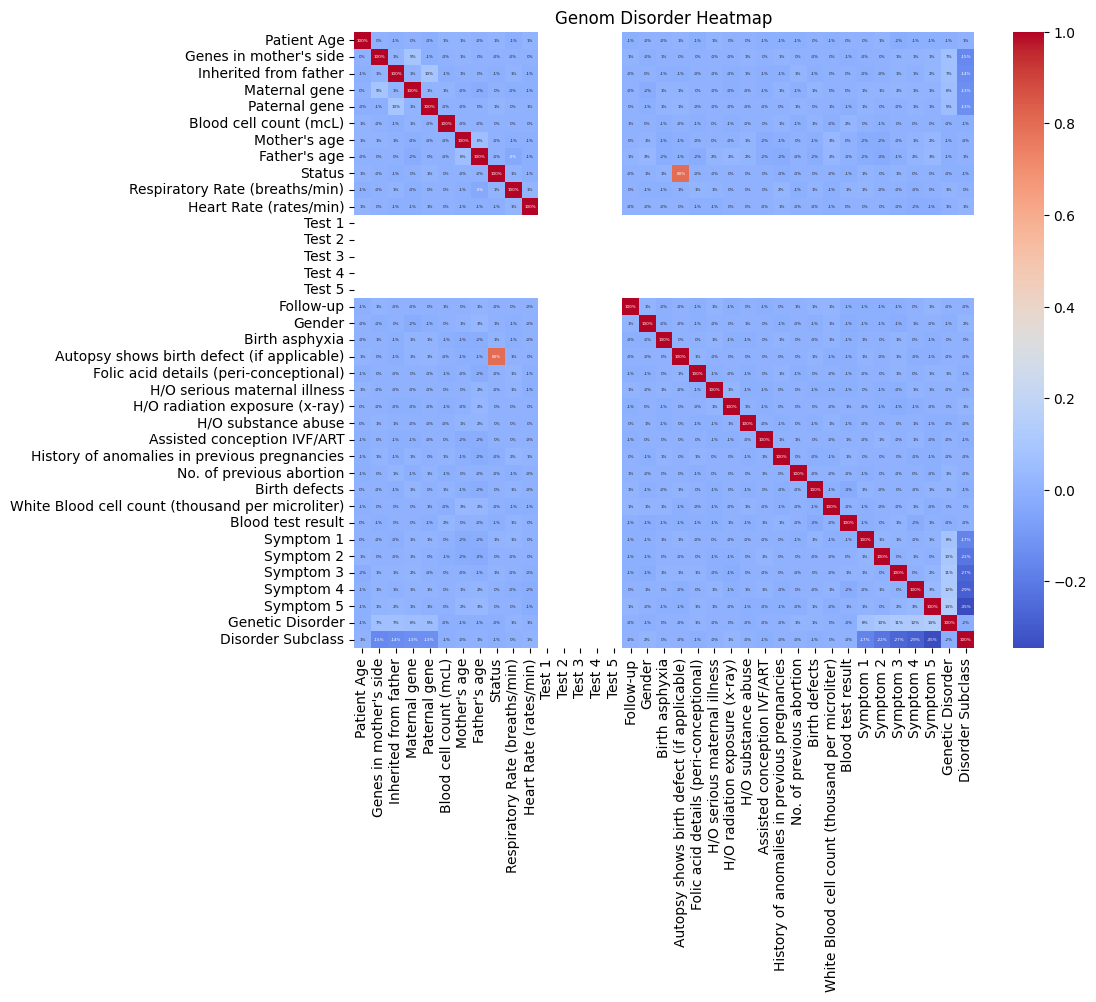

In [40]:
gen_train_corr = gen_train.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(gen_train_corr, annot=True, cmap='coolwarm', annot_kws={"fontsize": 3}, fmt=".0%")
plt.title("Genom Disorder Heatmap")
plt.show()

Split the training data for Genetic Disorders

In [41]:
X, y = gen_train.loc[:, gen_train.columns != 'Genetic Disorder'], gen_train.loc[:, 'Genetic Disorder']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

From here we implement the SVM algorithm from Sci-Kit

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6658365406384423


              precision    recall  f1-score   support

         0.0     0.6343    0.5197    0.5713      1545
         1.0     0.6863    0.8329    0.7525      2477
         2.0     0.5172    0.1899    0.2778       395

    accuracy                         0.6658      4417
   macro avg     0.6126    0.5142    0.5339      4417
weighted avg     0.6530    0.6658    0.6467      4417



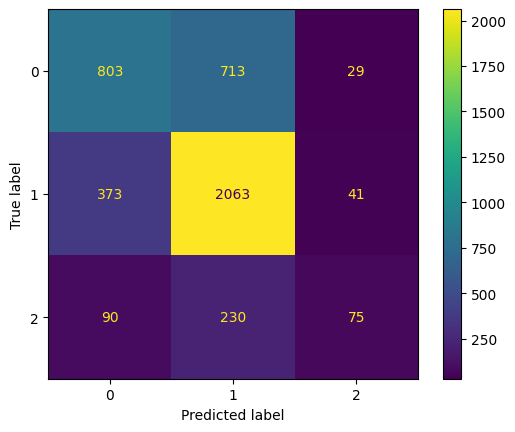

In [46]:
print(classification_report(y_test, y_pred, digits=4))

svc_cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(svc_cm).plot()
plt.show()

Split the Disorder Subclass from the training data in to a training and test set

In [47]:
x, y = gen_train.loc[:, gen_train.columns != 'Disorder Subclass'], gen_train.loc[:, 'Disorder Subclass']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6359520036223681


              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000        24
         1.0     0.6962    0.4015    0.5093       137
         2.0     0.8269    0.8590    0.8426       695
         3.0     0.8594    0.9153    0.8865       354
         4.0     0.5680    0.7071    0.6300      1458
         5.0     0.8889    0.9412    0.9143        17
         6.0     0.5701    0.7824    0.6596       556
         7.0     0.5667    0.1259    0.2061       270
         8.0     0.5437    0.3499    0.4258       906

    accuracy                         0.6360      4417
   macro avg     0.6133    0.5647    0.5638      4417
weighted avg     0.6294    0.6360    0.6139      4417



C:\Users\Austin Long\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austin Long\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austin Long\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_clas

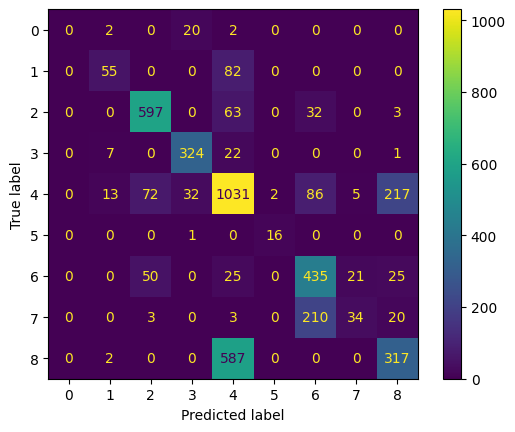

In [52]:
print(classification_report(y_test, y_pred, digits=4))

svc_cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(svc_cm).plot()
plt.show()

Extract feature names for LIME Explainer

In [53]:
features = gen_train.columns[:]
print(features)

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min)', 'Test 1',
       'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Follow-up', 'Gender',
       'Birth asphyxia', 'Autopsy shows birth defect (if applicable)',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')


In [67]:
from lime import lime_tabular

explainer_lime = lime_tabular.LimeTabularExplainer(X_train,
                                                   feature_names=features,
                                                  verbose=True,
                                                  mode='regression')

Apply LIME Explainer to an instance of the X_test set for a specific index i and show the contribution for k-number of features

In [68]:
i = 10

k = 5

exp_lime = explainer_lime.explain_instance(X_test[i], svc.predict, num_features=k)
exp_lime.show_in_notebook()

Intercept 1.5678584110802836
Prediction_local [2.55341876]
Right: 6.0


In [63]:
i = 7

k = 10

exp_lime = explainer_lime.explain_instance(X_test[i], svc.predict, num_features=k)
exp_lime.show_in_notebook()

Intercept 2.6586016742132252
Prediction_local [1.50502537]
Right: 4.0
